Final Project Report

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [29]:
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_info <- read_csv(url)
players_tidy <- select(players_info, experience, subscribe, played_hours, gender, age)
players_tidy

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_hours,gender,age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,0.0,Prefer not to say,17
Amateur,FALSE,2.3,Male,17
Pro,TRUE,0.2,Other,91


$title
[1] "Total Played Hours by Age"

attr(,"class")
[1] "labels"

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

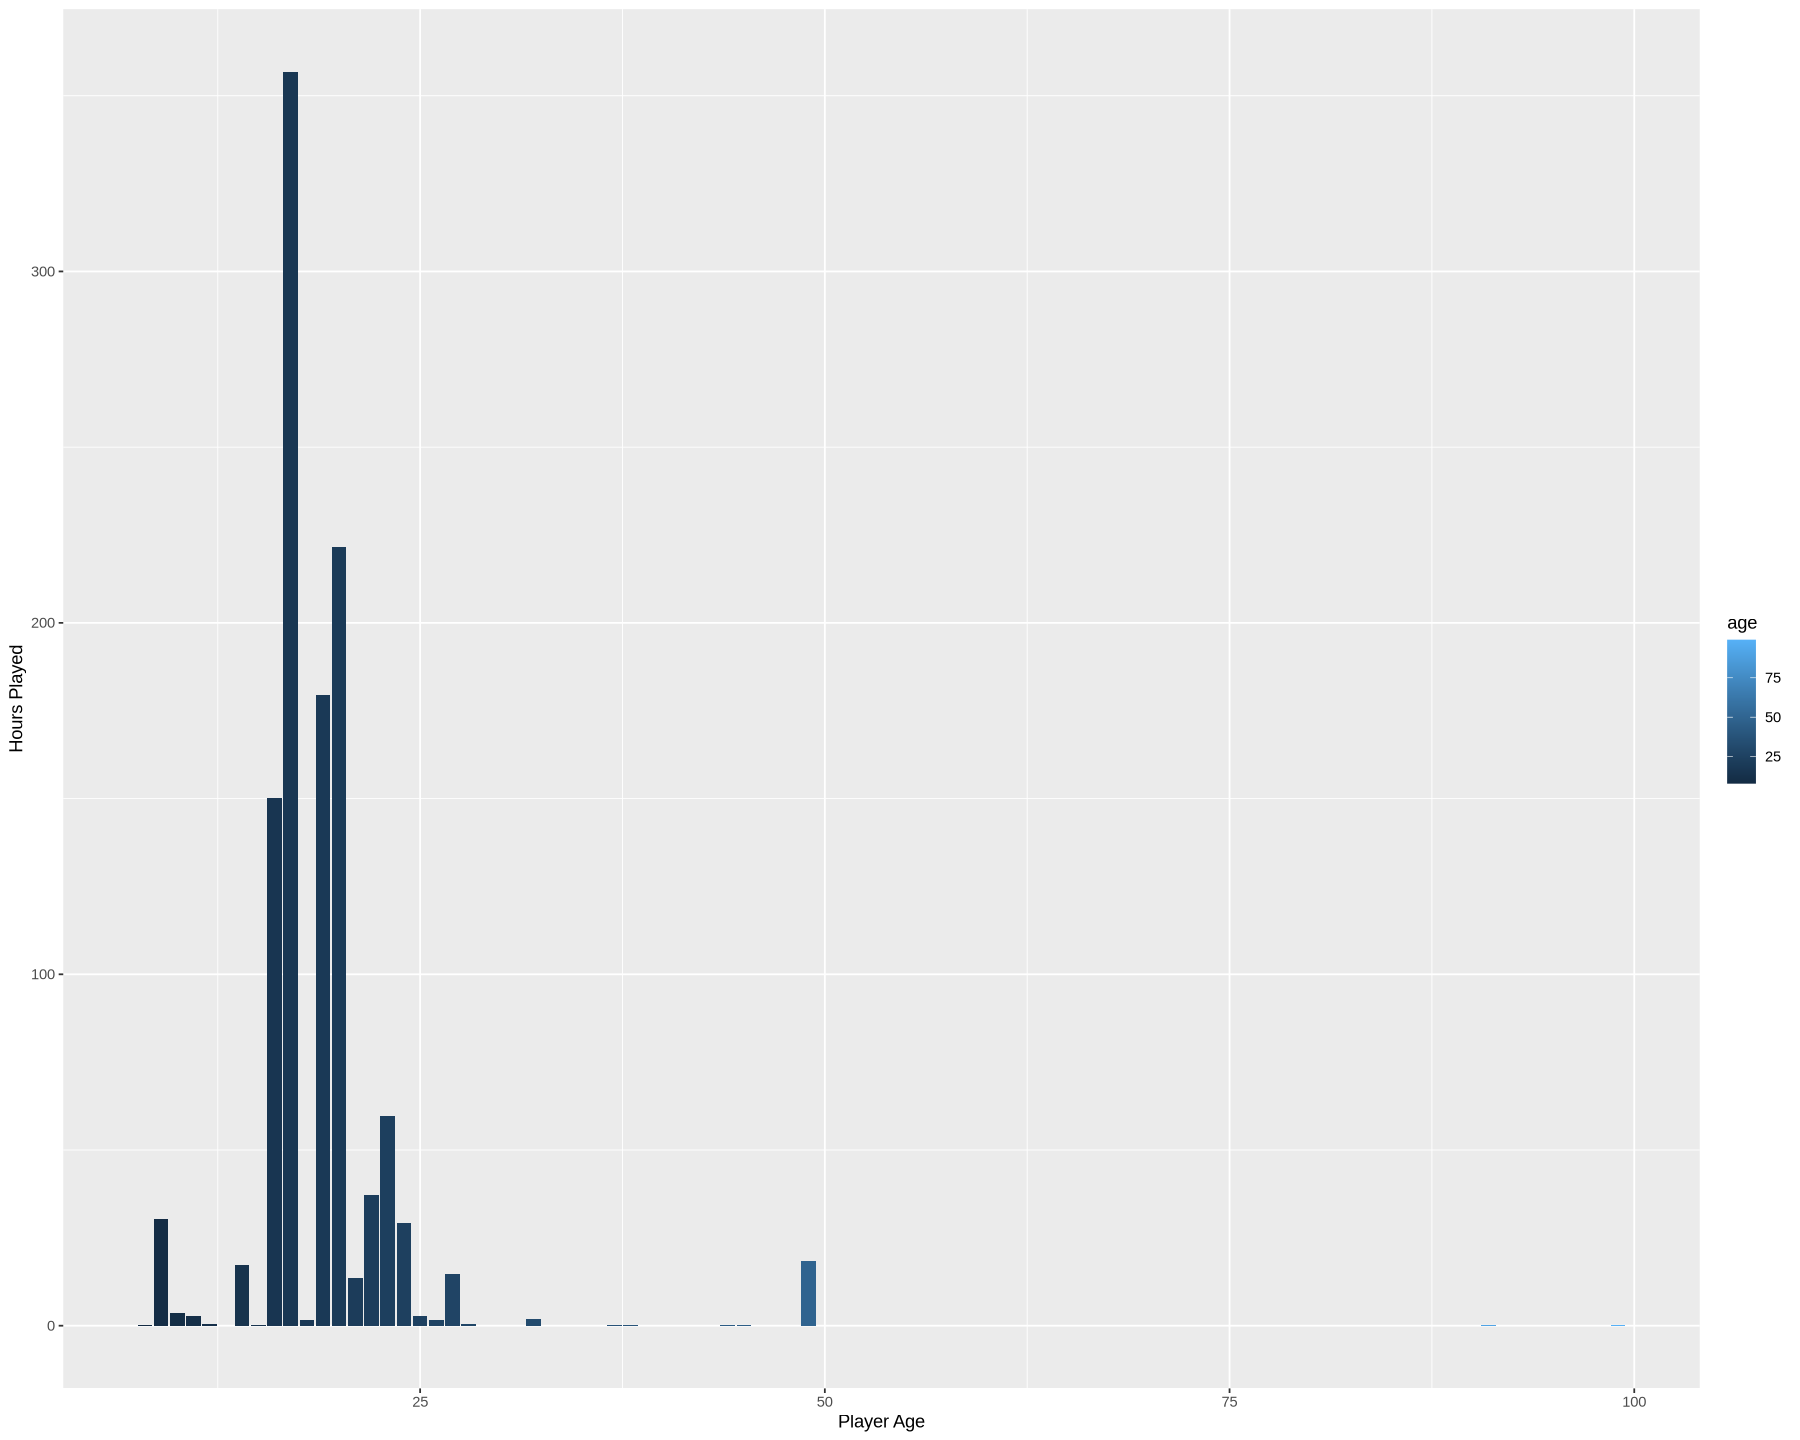

In [41]:
#mapping player age against played hours 
players_age <- players_tidy |>
  ggplot(aes(x = age, y = played_hours, fill = age)) +
  geom_bar(stat = "identity") +
  labs(x = "Player Age",
       y = "Hours Played",
       color = "Age")
ggtitle ("Total Played Hours by Age")
  theme(text = element_text(size = 12))
players_age

(Not Part of Prose)

As observed from the graph, the players who have contributed the most hours are generally sithin the 13-25 range. While this may seem to hold greater meaning, upon further reflection, this makes intuitive sense, as those who are typically on PlAICraft, have access to technology, and have time to be playing will be those who are younger. This does not give further information that influences other factors that impact playing time, like gender, experience, or subscription level might. As such, continuing onwards, we will not be looking at age as a determining factor, and only generalize the range of most players to be bewteen 13-25.


NULL

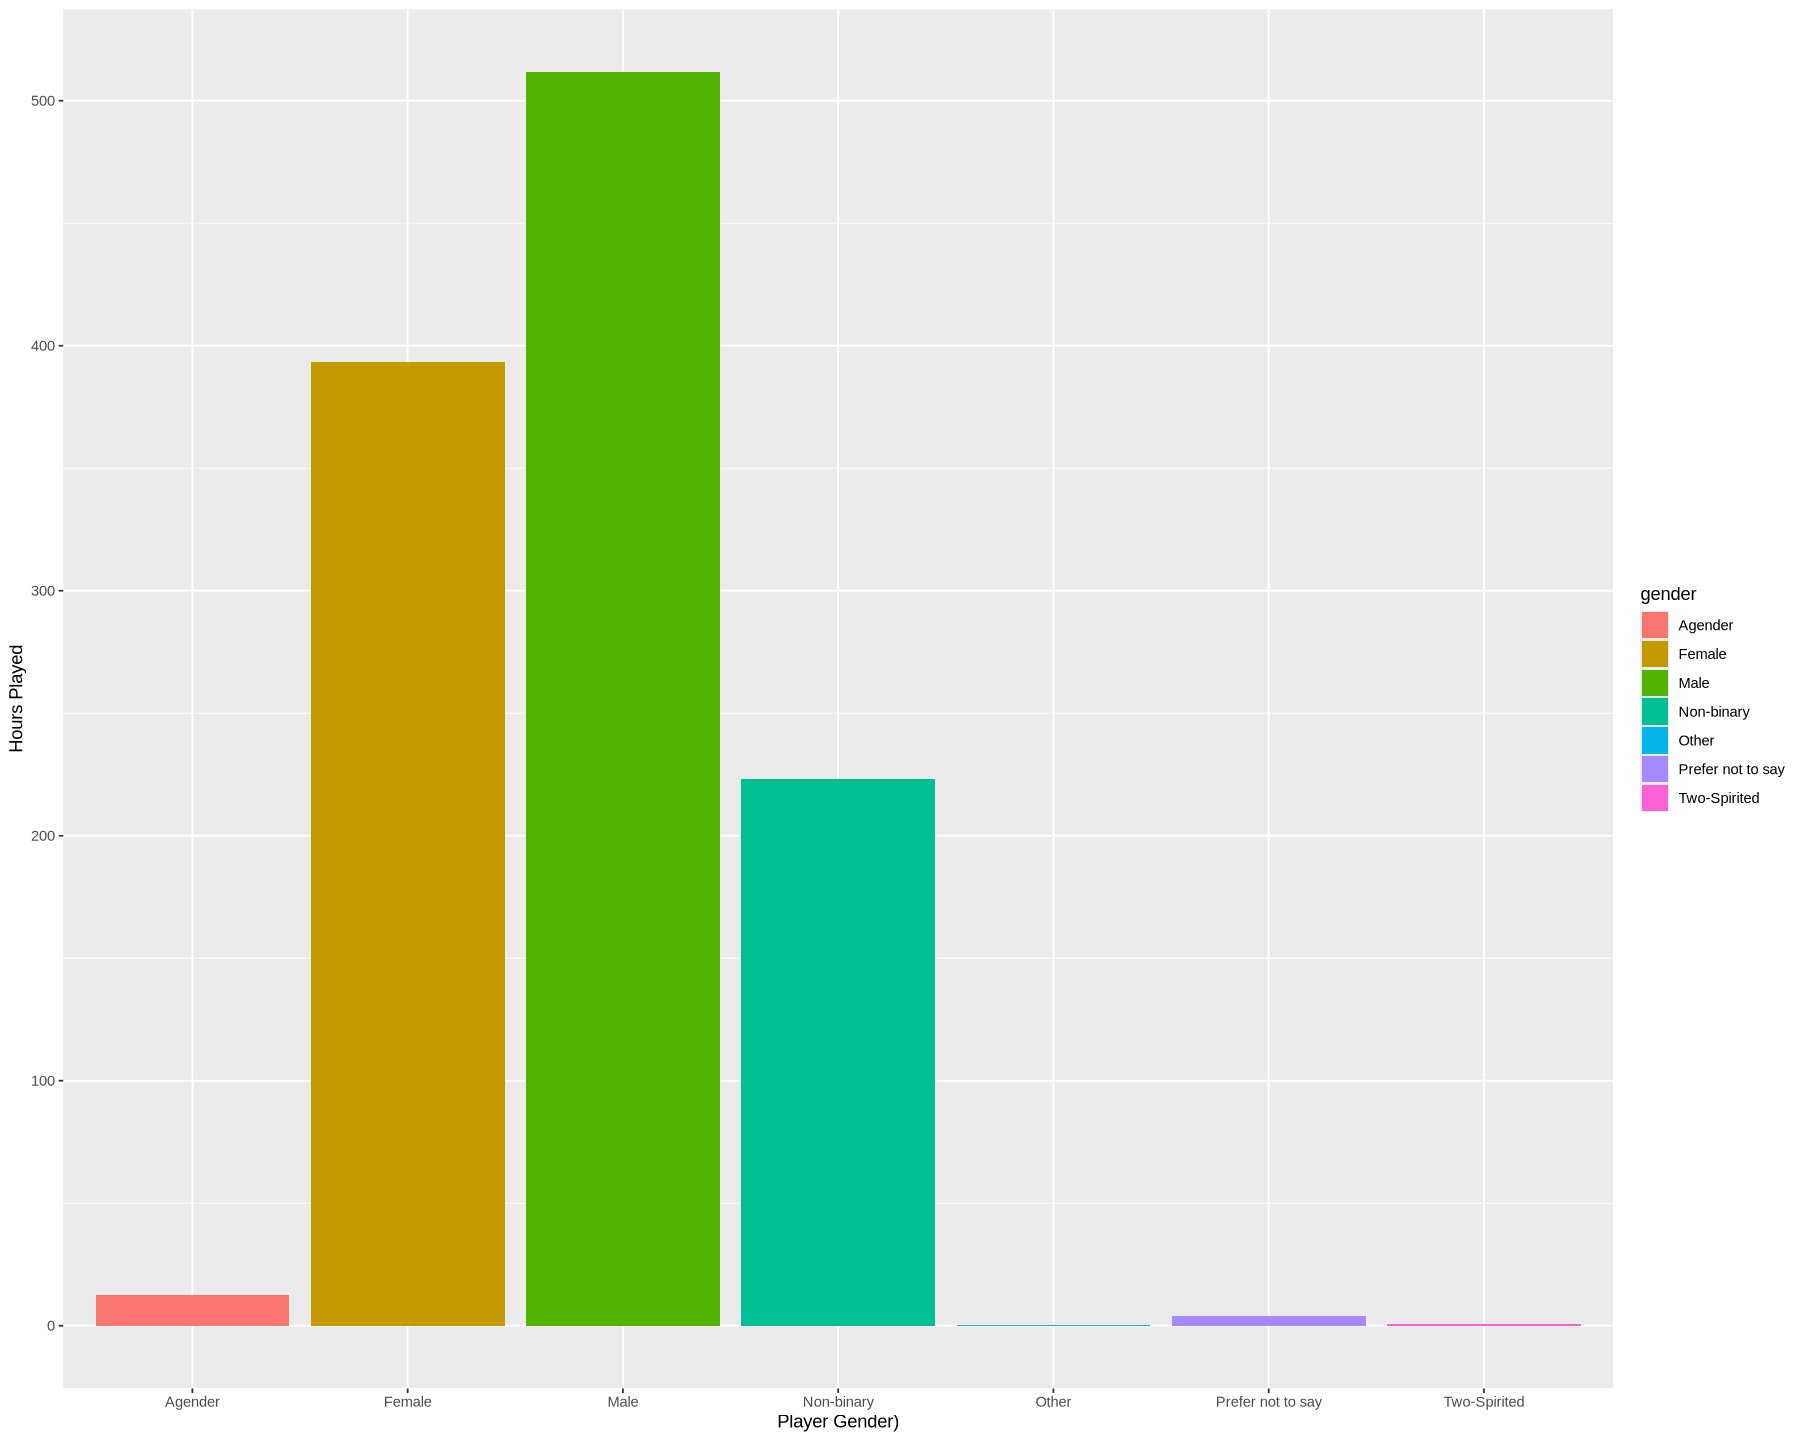

In [42]:
gender_data_plot <- players_tidy |>
  ggplot(aes(x = gender, y = played_hours, fill = gender)) +
  geom_bar(stat = "identity") +
  labs(x = "Player Gender)",
       y = "Hours Played",
       color = "Gender Identification")
ggtitle ("Total Played Hours by Gender Identification") +
scale_color_brewer(palette="Set2") +
theme(text=element_text(size=16), axis.text.x=element_text(angle=90, hjust=1))

gender_data_plot

Additionally, 

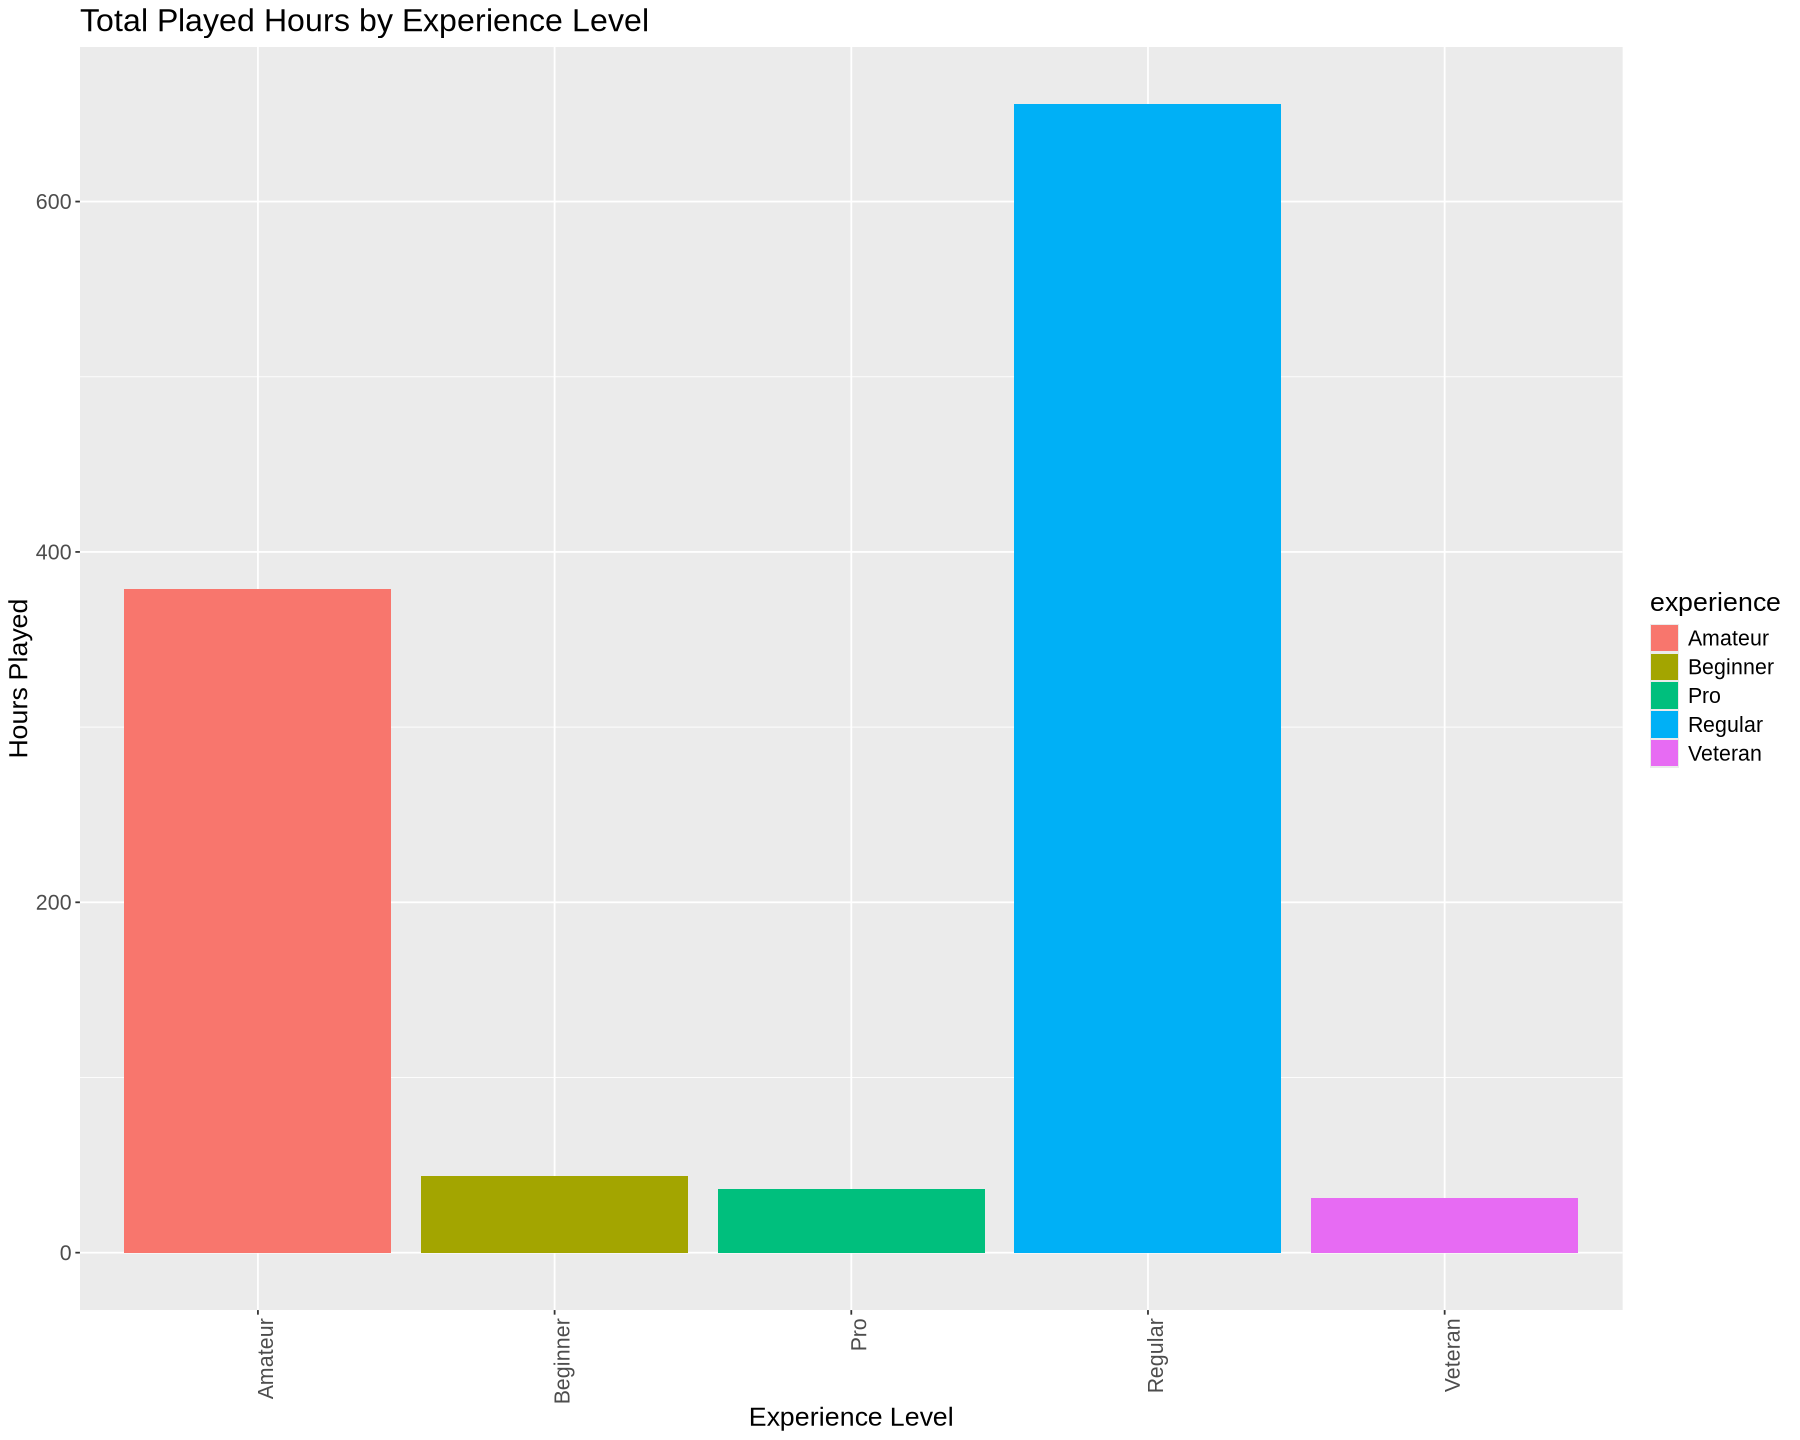

In [36]:
experience_data_plot<- players_tidy |>
  ggplot(aes(x = experience, y = played_hours, fill = experience)) +
  geom_bar(stat="identity") +
  labs(x = "Experience Level",
       y = "Hours Played",
       color = "Experience Level")+

ggtitle ("Total Played Hours by Experience Level") +
scale_color_brewer(palette="Set2") +
theme(text=element_text(size=16), axis.text.x=element_text(angle=90, hjust=1))
experience_data_plot

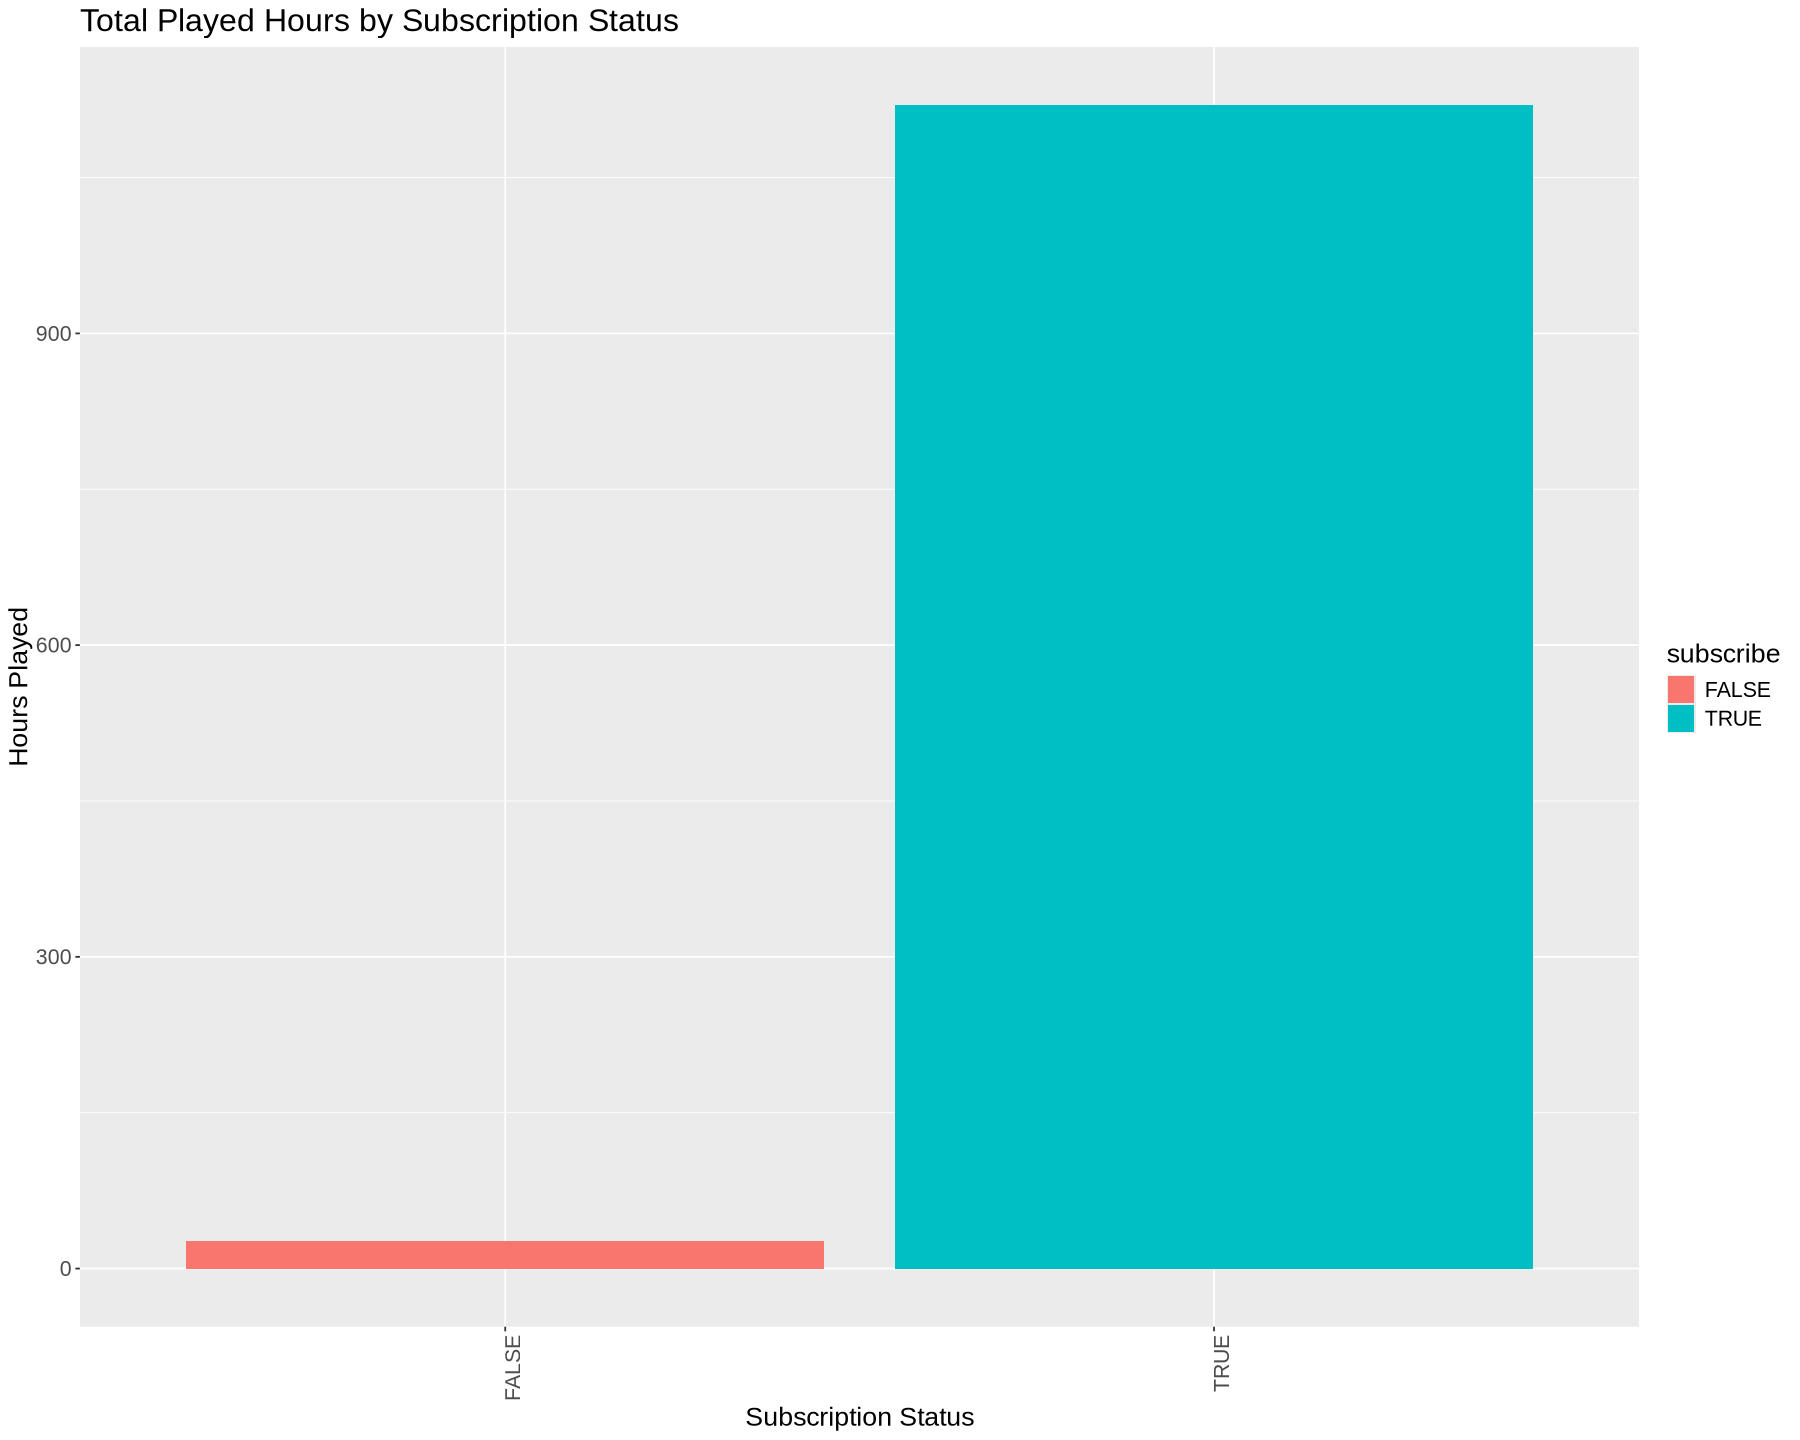

In [37]:
subscription_data_plot <- players_tidy |>
  ggplot(aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_bar(stat = "identity") +
  labs(x = "Subscription Status",
       y = "Hours Played",
       color = "Subscribed to PlaiCraft?") +
ggtitle ("Total Played Hours by Subscription Status") +
scale_color_brewer(palette="Set2") +
theme(text=element_text(size=16), axis.text.x=element_text(angle=90, hjust=1))

subscription_data_plot

NULL

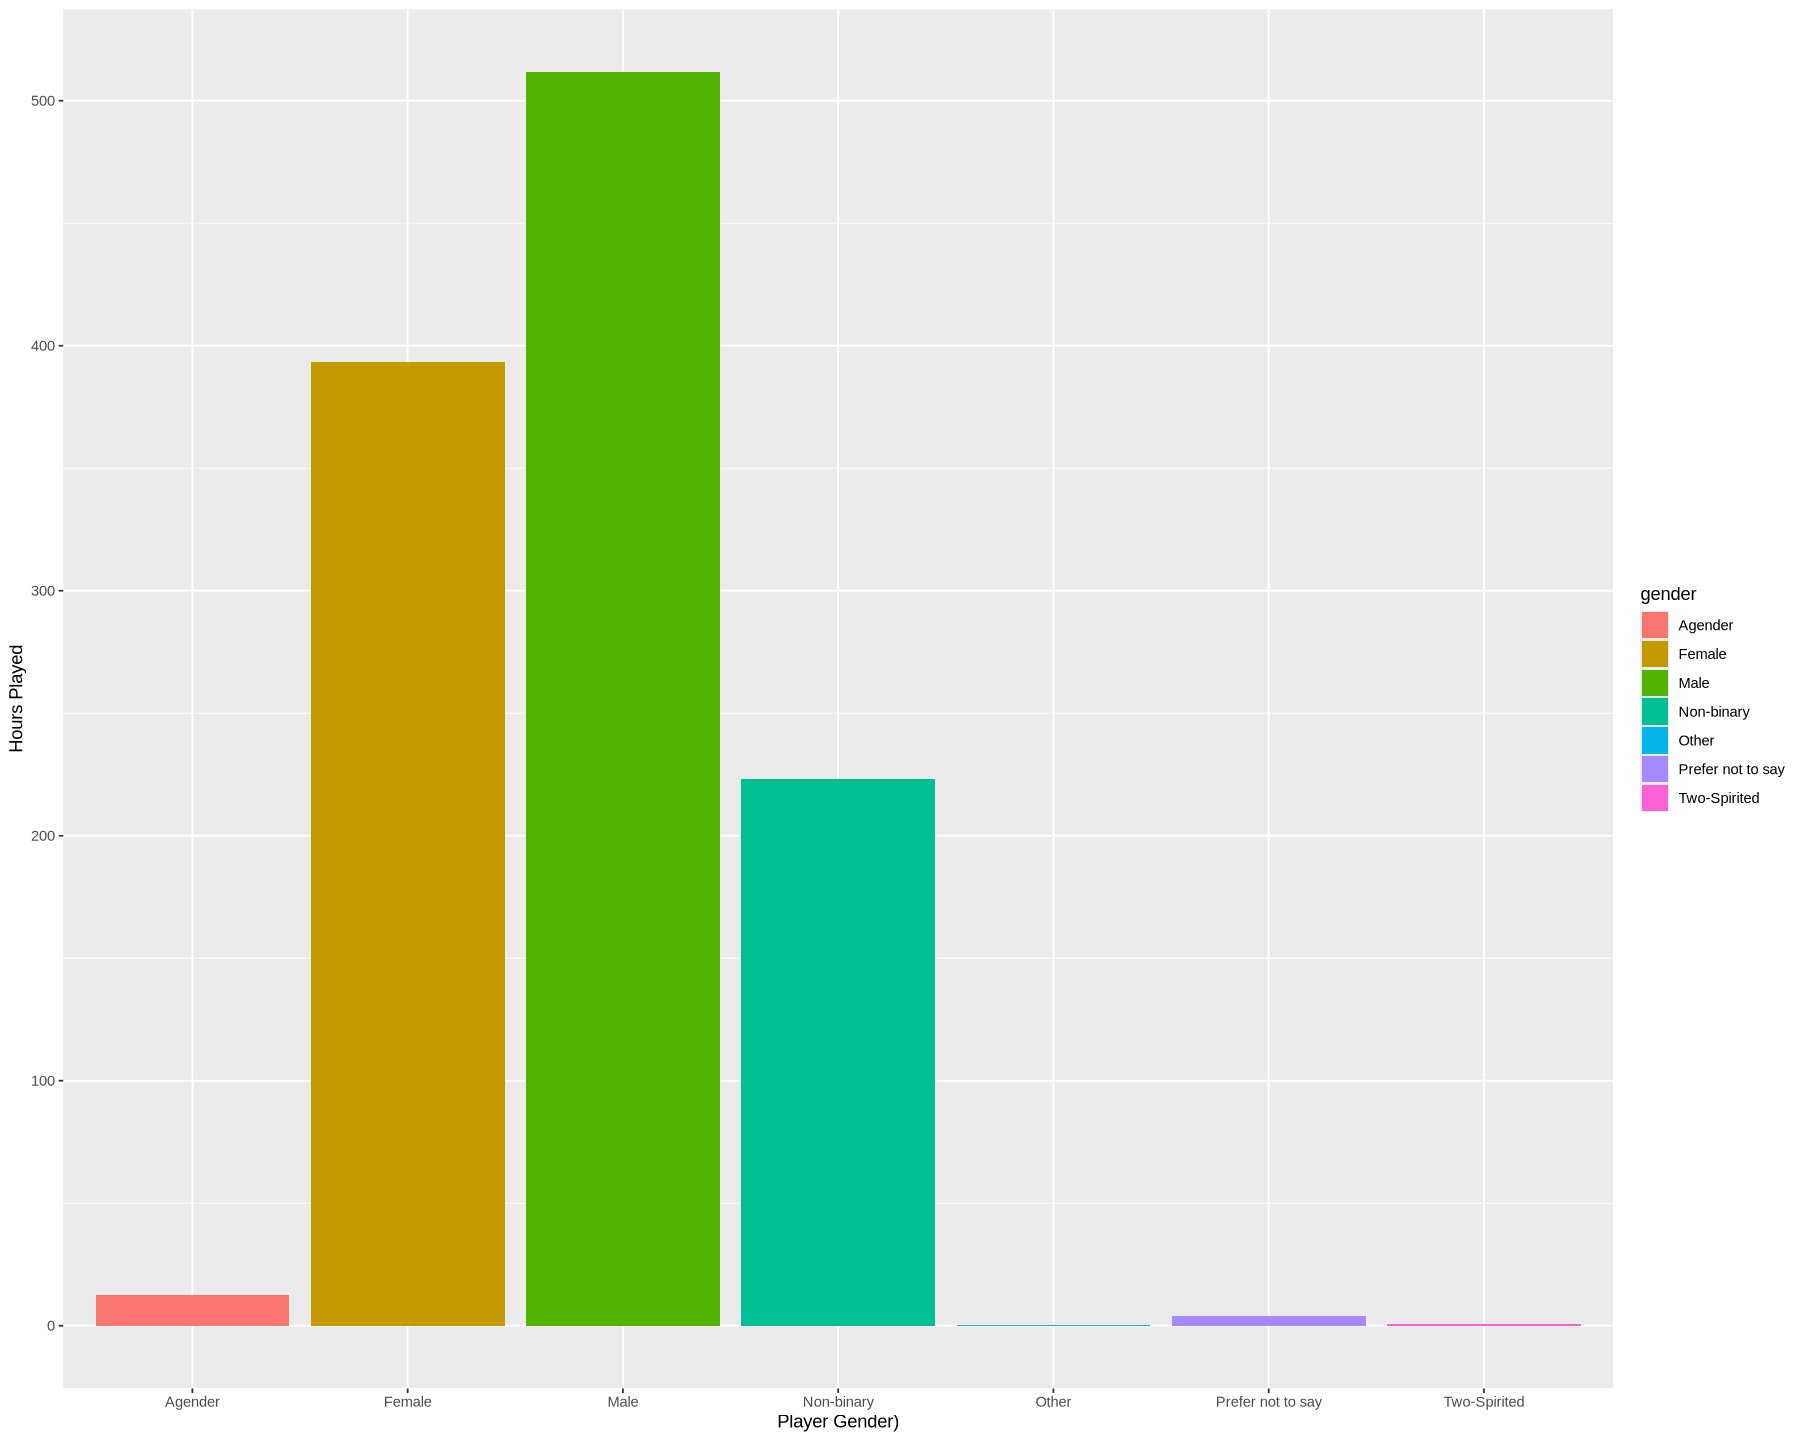

In [39]:
gender_data_plot <- players_tidy |>
  ggplot(aes(x = gender, y = played_hours, fill = gender)) +
  geom_bar(stat = "identity") +
  labs(x = "Player Gender)",
       y = "Hours Played",
       color = "Gender Identification")
ggtitle ("Total Played Hours by Gender Identification") +
scale_color_brewer(palette="Set2") +
theme(text=element_text(size=16), axis.text.x=element_text(angle=90, hjust=1))

gender_data_plot